In [7]:
import pandas as pd

jobs_adzuna = pd.read_csv("../Sofia/jobs_adzuna_analysis.csv")
jobs_github = pd.read_csv("../MG/final_jobs.csv")

combined = pd.concat([jobs_adzuna, jobs_github], ignore_index=True)

combined.to_csv("combined.csv", index=False)



In [9]:
print(combined.shape)
print(combined.head())
print(combined["job_title"].value_counts())


(1857, 6)
   date     job_title  salary_in_usd work_mode country  \
0  2025         Other        52996.0    onsite      GB   
1  2025  Data Analyst        50000.0    hybrid      GB   
2  2025  Data Analyst        24000.0    onsite      GB   
3  2025  Data Analyst        35000.0    onsite      GB   
4  2025  Data Analyst        43779.0    onsite      GB   

                                        skills  
0                                        ['r']  
1  ['excel', 'power bi', 'python', 'r', 'sql']  
2                                        ['r']  
3                                        ['r']  
4                                        ['r']  
job_title
Data Analyst                  775
Other                         464
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     62
Machine Learning                2
Name: count, dtype: int64


In [22]:
#drop rows where job_title is "Other":

combined = combined[combined["job_title"] != "Other"]
combined['job_title'] = combined['job_title'].replace('Machine Learning', 'Machine Learning Developer')
print(combined["job_title"].value_counts())
print(combined.shape)


job_title
Data Analyst                  775
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     64
Name: count, dtype: int64
(1393, 6)


In [23]:
combined

,date,job_title,salary_in_usd,work_mode,country,skills
1,2025,Data Analyst,50000.0,hybrid,GB,"[excel, power bi, python, r, sql]"
2,2025,Data Analyst,24000.0,onsite,GB,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."
3,2025,Data Analyst,35000.0,onsite,GB,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."
4,2025,Data Analyst,43779.0,onsite,GB,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."
5,2025,Data Analyst,25904.0,onsite,GB,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."
...,...,...,...,...,...,...
1852,2022,Data Engineer,154000.0,remote,US,"[Python, Java, Scala, SQL, NoSQL, ETL, pipelin..."
1853,2022,Data Engineer,126000.0,remote,US,"[Python, Java, Scala, SQL, NoSQL, ETL, pipelin..."
1854,2022,Data Analyst,129000.0,on_site,US,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."
1855,2022,Data Analyst,150000.0,remote,US,"[SQL, Excel, Python, R, Tableau, Power BI, Sta..."


In [24]:
import ast

skills_map = {
    'Data Scientist': [
        'Python', 'R',
        'Statistics',
        'Machine learning',
        'Data cleaning',
        'SQL',
        'Visualization (e.g. Tableau)',
        'Big data (e.g. Spark)',
        'Model validation',
        'Communication',
        'Domain knowledge'
    ],
    'Machine Learning Developer': [
        'Python', 'C++',
        'TensorFlow', 'PyTorch',
        'ML algorithms',
        'Data pipelines',
        'Deployment',
        'Cloud (AWS, GCP)',
        'Git',
        'Math',
        'Experiment tracking',
        'Software practices'
    ],
    'Data Engineer': [
        'Python', 'Java', 'Scala',
        'SQL', 'NoSQL',
        'ETL', 'pipelines',
        'Spark', 'Kafka',
        'Airflow',
        'Cloud platforms',
        'Data modeling',
        'Docker', 'Kubernetes',
        'APIs',
        'Linux'
    ],
    'Data Analyst': [
        'SQL',
        'Excel',
        'Python', 'R',
        'Tableau', 'Power BI',
        'Statistics',
        'Cleaning data',
        'Reporting',
        'Communication',
        'Business insight',
        'Critical thinking'
    ]
}


# Ensure 'skills' column is in list format
combined['skills'] = combined['skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Replace rows where skills == ['r']
def replace_r_skills(row):
    if row['skills'] == ['r']:
        return skills_map.get(row['job_title'], row['skills'])
    return row['skills']

combined['skills'] = combined.apply(replace_r_skills, axis=1)

combined.to_csv("combined.csv", index=False)



In [25]:
print(combined['job_title'].value_counts())


job_title
Data Analyst                  775
Data Engineer                 284
Data Scientist                270
Machine Learning Developer     64
Name: count, dtype: int64


In [26]:
print(combined[combined['skills'].apply(lambda x: x == ['r'])])


Empty DataFrame
Columns: [date, job_title, salary_in_usd, work_mode, country, skills]
Index: []


In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 1 to 1856
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1393 non-null   int64  
 1   job_title      1393 non-null   object 
 2   salary_in_usd  1010 non-null   float64
 3   work_mode      1393 non-null   object 
 4   country        1393 non-null   object 
 5   skills         1393 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 76.2+ KB


<Axes: >

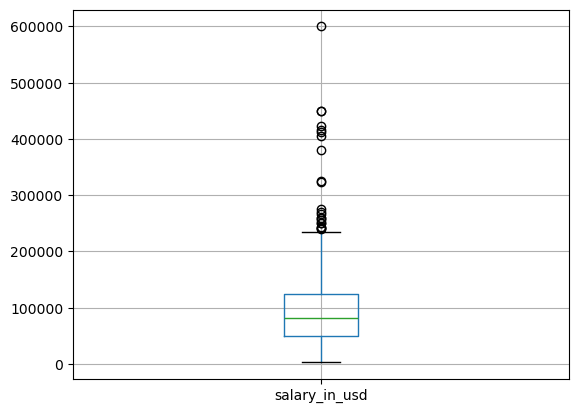

In [30]:
combined.boxplot(column='salary_in_usd')

In [ ]:
#Check Summary Statistics
print(combined['salary_in_usd'].describe())


count      1010.000000
mean      95487.340594
std       62510.635287
min        2859.000000
25%       49830.500000
50%       82325.000000
75%      125000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


In [32]:
#Remove or Flag Outliers

Q1 = combined['salary_in_usd'].quantile(0.25)
Q3 = combined['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

filtered_combined = combined[
    (combined['salary_in_usd'] >= Q1 - 1.5 * IQR) &
    (combined['salary_in_usd'] <= Q3 + 1.5 * IQR)
]


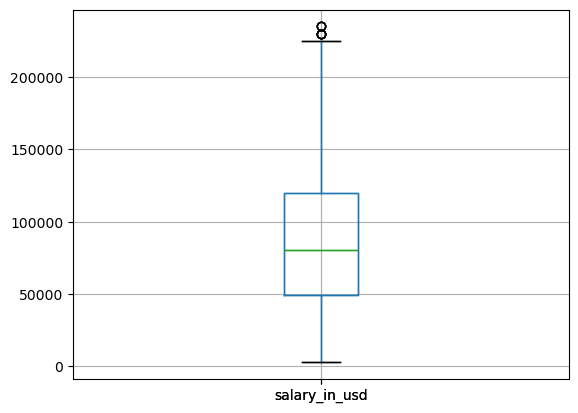

In [36]:
import matplotlib.pyplot as plt

filtered_combined.boxplot(column='salary_in_usd')
plt.show()


In [35]:
print(filtered_combined['salary_in_usd'].describe())


count       988.000000
mean      90285.338057
std       50457.533227
min        2859.000000
25%       49133.500000
50%       80486.500000
75%      120000.000000
max      235000.000000
Name: salary_in_usd, dtype: float64


In [37]:
print(filtered_combined.shape)
print(filtered_combined.head())
print(filtered_combined["job_title"].value_counts())

(988, 6)
   date     job_title  salary_in_usd work_mode country  \
1  2025  Data Analyst        50000.0    hybrid      GB   
2  2025  Data Analyst        24000.0    onsite      GB   
3  2025  Data Analyst        35000.0    onsite      GB   
4  2025  Data Analyst        43779.0    onsite      GB   
5  2025  Data Analyst        25904.0    onsite      GB   

                                              skills  
1                  [excel, power bi, python, r, sql]  
2  [SQL, Excel, Python, R, Tableau, Power BI, Sta...  
3  [SQL, Excel, Python, R, Tableau, Power BI, Sta...  
4  [SQL, Excel, Python, R, Tableau, Power BI, Sta...  
5  [SQL, Excel, Python, R, Tableau, Power BI, Sta...  
job_title
Data Analyst                  470
Data Engineer                 233
Data Scientist                225
Machine Learning Developer     60
Name: count, dtype: int64
